## Imports

In [43]:
import cv2
import numpy as np
import math

## Display function

In [4]:
def display(image):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10,10))
    plt.axis("off")
    plt.imshow(image)
    plt.show()

## Image Input and Display

In [3]:
img = cv2.imread("images.jpg")

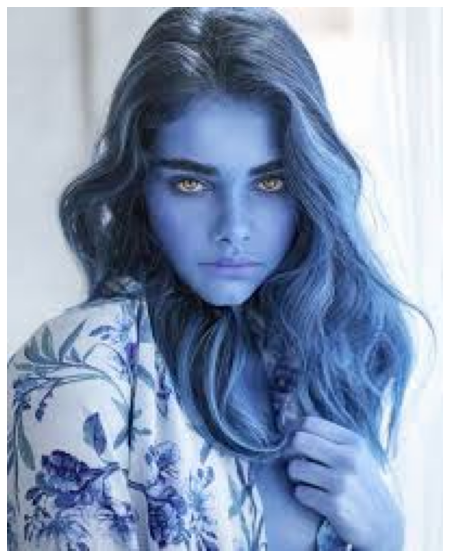

In [5]:
display(img)

In [8]:
img.shape

(251, 201, 3)

## Task 1 :- Transform the image in the +x direction by 25%, and create an image

In [18]:
def offset_x(img, ratio):
    offset_width = int(img.shape[1]*ratio)
    offset_img = np.zeros(img.shape, np.uint8)
    offset_img[:,offset_width:,:] = img[:,:(img.shape[1]-offset_width),:]
    return offset_img

In [19]:
offset_img_x = offset_x(img,0.25)

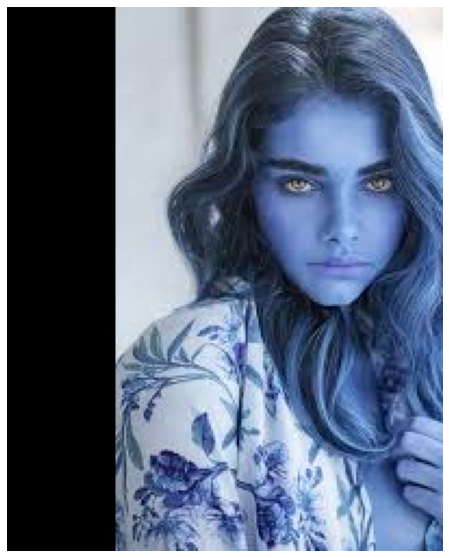

In [20]:
display(offset_img_x)

## Task 2 :- Transform the image in the +y direction by 25%, and create an image

In [21]:
def offset_y(img, ratio):
    offset_height = int(img.shape[0]*ratio)
    offset_img = np.zeros(img.shape, np.uint8)
    offset_img[offset_height:,:,:] = img[:(img.shape[0]-offset_height),:,:]
    return offset_img

In [22]:
offset_img_y = offset_y(img,0.25)

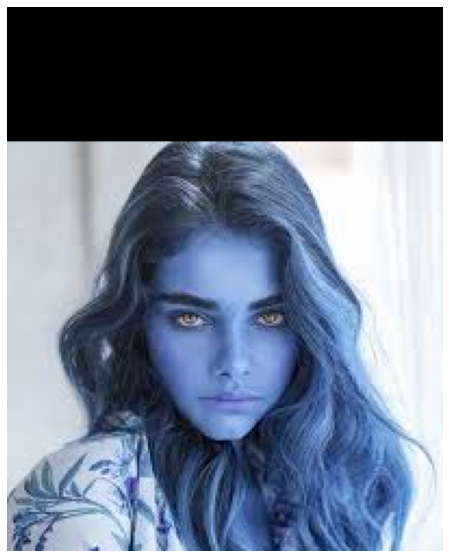

In [23]:
display(offset_img_y)

## Task 3 :- Rotate the image in Z by 90 degree

In [24]:
image_z_90 = cv2.rotate(img, cv2.cv2.ROTATE_90_CLOCKWISE)

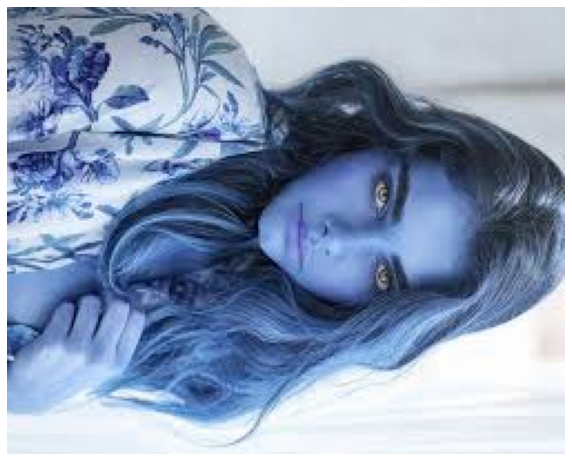

In [25]:
display(image_z_90)

## Task 4 :- Rotate the image in Z by -90 degree

In [26]:
image_z_270 = cv2.rotate(img, cv2.cv2.ROTATE_90_COUNTERCLOCKWISE)

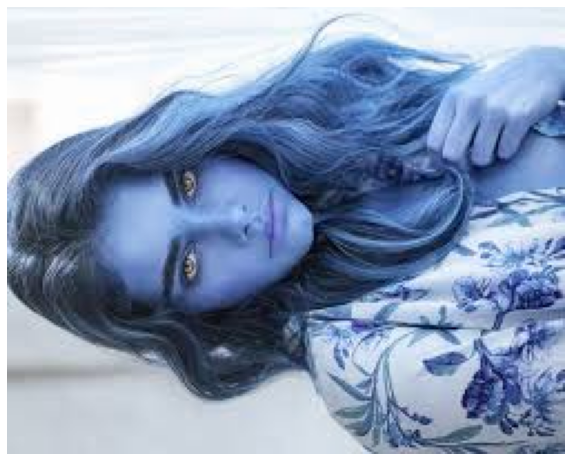

In [27]:
display(image_z_270)

## Task 5 :- From the center of the image, in all directions, increase the RGB values of the pixels in a manner that, each pixel from the center, the percentage drops by 1%. i.e. the center pixel's RGB will increase by 50%, and the next pixels in x and y directions will be 49%. This goes on and on until the increase becomes 0 %.

In [50]:
def tranform_task(img, start_per):
    shape = list(img.shape)
    transform_img = np.zeros(shape, np.uint8)
    mid_point = [int(dimension/2) for dimension in shape[:2]]
    for x in range(shape[0]):
        for y in range(shape[1]):
            distance_center = int(math.sqrt((x-mid_point[0])**2 + (y-mid_point[1])**2))
            per_change = start_per-distance_center
            ratio_change = (1 + per_change/100.0) if per_change>0 else 1
            transform_img[x,y,:] = ratio_change*img[x,y,:]
    return transform_img
            

In [63]:
transform_img = tranform_task(img, 50)

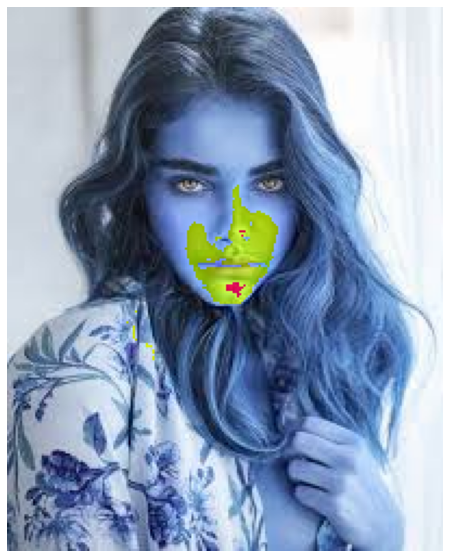

In [64]:
display(transform_img)